<a href="https://colab.research.google.com/github/viethung52/AI/blob/main/dog%26cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models       import Sequential
from keras.layers       import Conv2D
from keras.layers       import MaxPooling2D
from keras.layers       import Flatten
from keras.layers       import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers   import SGD

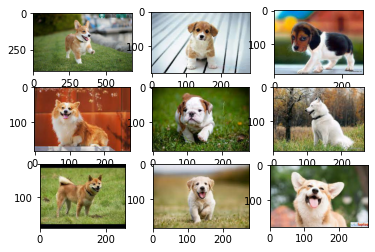

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread 
folder = '/content/drive/MyDrive/AI/VietHung/VietHung/train1/dog/'
for i in range(9):
  plt.subplot(330 + i + 1)
  filename = folder + '/dog' + str(i) + '.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

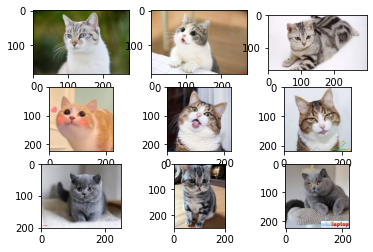

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread 
folder = '/content/drive/MyDrive/AI/VietHung/VietHung/train1/meo/'
for i in range(9):
  plt.subplot(330 + i + 1)
  filename = folder + '/meo' + str(i) + '.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os     import listdir
from numpy  import asarray
from numpy  import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/AI/VietHung/VietHung/train1/dog/'
photos, labels = list(), list()

for file in listdir(folder):
  output = 0
  if file.startswith('dog'):
    output == 1.0
  photo = load_img(folder + file, target_size=(200, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
  
print(photos.shape, labels.shape)
save('dog&cat_photos.npg',photo)
save('dog&cat_labels.npg',labels)


(10, 200, 200, 3) (10,)


In [ ]:

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same', input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu',
                 kernel_initializer='he_uniform'))
model.add(Dense(1,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(photos, labels,epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+0

In [ ]:
model.save('Final_dog&cat.h5')

In [ ]:
from keras.models import load_model
model5 = load_model('Final_dog&cat.h5')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dog.jfif to dog.jfif


In [ ]:

from keras.preprocessing.image   import load_img
from keras.preprocessing.image  import img_to_array
from keras.models               import load_model
import numpy as np
import matplotlib.pyplot as plt

img = load_img('dog.jfif', target_size=(200, 200))
img = img_to_array(img)
img = img.reshape(1, 200, 200, 3)
img = img.astype('float32')
img = img / 255.0

# load model
#model = load_model('/content/Final_dogvscat.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

Giá trị dự đoán: 0
